<h1 align="center">CAS Modeling</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, GammaRegressor
from lime import lime_tabular
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

sns.set_theme()
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

## Importing data

In [3]:
df= pd.read_csv('CAS Preprocessed.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,claimAmount
0,1406914.0,4915023.0,0.0,0.0,0.0,1.0,0.0,None,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,Non-Injury Crash,No,2000,0.0,East,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otago Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,70.0,0.0,None,0.0,0.0,Dunedin City,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,1.0,0.0,0.0,Fine,91105.0
1,1799023.0,5814728.0,0.0,0.0,0.0,3.0,0.0,North,2011/2012,SH 1N,KILLARNEY ROAD,Non-Injury Crash,Yes,2012,0.0,South,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Bright sun,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,60.0,0.0,None,0.0,0.0,Hamilton City,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,91554.0
2,1741193.0,5976099.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Twilight,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,81110.0
3,1790288.0,5837387.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,89788.0
4,1615675.0,5423627.0,0.0,0.0,0.0,2.0,0.0,None,2003/2004,TALBOT ST,ELIZABETH ST,Non-Injury Crash,No,2003,0.0,West,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tasman Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Tasman District,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine,54222.0


In [4]:
df.shape

(758006, 62)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758006 entries, 0 to 758005
Data columns (total 62 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   X                          758006 non-null  float64
 1   Y                          758006 non-null  float64
 2   bicycle                    758006 non-null  float64
 3   bridge                     758006 non-null  float64
 4   bus                        758006 non-null  float64
 5   carStationWagon            758006 non-null  float64
 6   cliffBank                  758006 non-null  float64
 7   crashDirectionDescription  758006 non-null  object 
 8   crashFinancialYear         758006 non-null  object 
 9   crashLocation1             758006 non-null  object 
 10  crashLocation2             758006 non-null  object 
 11  crashSeverity              758006 non-null  object 
 12  crashSHDescription         758006 non-null  object 
 13  crashYear                  75

In [6]:
df = df.loc[(df['minorInjuryCount'] > 0) & (df['minorInjuryCount'] < 5)] 

In [7]:
df.shape

(187536, 62)

In [8]:
null_columns = df.columns[df.isnull().any()]
(df[null_columns].isnull().sum()/len(df))*100

Series([], dtype: float64)

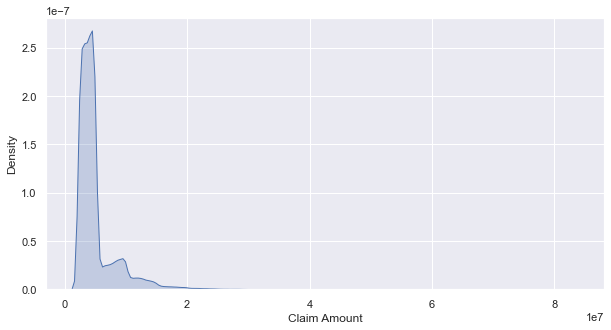

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['claimAmount'],shade=True)
plt.show()

In [10]:
df['Log_claimAmount'] = np.log(df['claimAmount'])

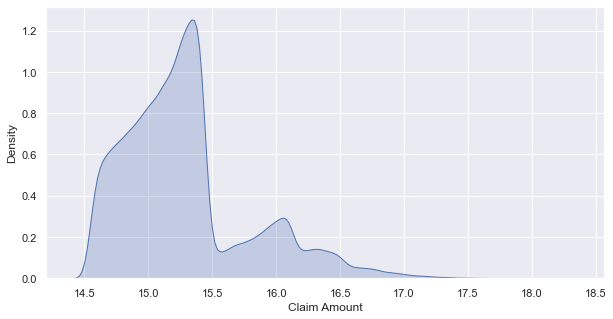

In [11]:
plt.figure(figsize=(10,5))
plt.xlabel('Claim Amount')
plt.ylabel('Density')
sns.kdeplot(df['Log_claimAmount'],shade=True)
plt.show()

## Modeling

### LIME

In [12]:
def lime(model, X_test, y_test, X_train, y_train):
    explainer = lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", feature_names= X_train.columns)
    random.seed(108)
    idx = random.randint(1, len(X_test))
    print("Prediction : ", model.predict(X_test.iloc[idx]))
    print("Actual :     ", y_test.iloc[idx])

    explanation = explainer.explain_instance(X_test.iloc[idx], model.predict, num_features=len(X_train.columns))
    return explanation

In [13]:
def multicollinearity_assumption(model, features, label, feature_names=None):        
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [14]:
def calculate_residuals(model, features, label, transformation=False):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label.squeeze(1), 'Predicted': predictions})
    if not transformation:
        df_results['Residuals'] = (df_results['Actual'] - df_results['Predicted'])
        df_results['Residuals_per'] = abs(df_results['Residuals']/df_results['Actual'])
    if transformation:
        df_results['ActualT'] = np.exp(df_results['Actual'])
        df_results['PredictedT'] = np.exp(df_results['Predicted'])
        df_results['Residuals'] = (df_results['ActualT'] - df_results['PredictedT'])
        df_results['Residuals_per'] = abs(df_results['Residuals']/df_results['ActualT'])
        
    return df_results

In [15]:
def homoscedasticity_assumption(model, features, label):     
    df_results = calculate_residuals(model, features, label)

    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    plt.title('Residuals')
    plt.show()  

In [16]:
def normal_errors_assumption(model, features, label):
    df_results = calculate_residuals(model, features, label) 
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

In [17]:
def Feature_imp(Model,n,X,y):
    model = Model
    # create the RFE model and select attributes
    rfe = RFE(model,n_features_to_select= n)
    rfe = rfe.fit(X, y)
    # summarize the selection of the attributes
    return pd.DataFrame({'Decision':rfe.support_,'Ranking':rfe.ranking_,'Feature':X.columns})

### Gamma distribution

In [18]:
formula = "claimAmount ~ bicycle+bridge+bus+carStationWagon+cliffBank+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+phoneBoxEtc+postOrPole+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver"
y, X = dmatrices(formula, df, return_type='dataframe')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
Feature = Feature_imp(GammaRegressor(),10,X_test,y_test)
Feature[Feature.Decision == True]

,Decision,Ranking,Feature
3,True,1,streetLight[T.Off]
4,True,1,streetLight[T.On]
6,True,1,bicycle
9,True,1,carStationWagon
18,True,1,motorcycle
19,True,1,NumberOfLanes
24,True,1,parkedVehicle
30,True,1,speedLimit
32,True,1,suv
40,True,1,vanOrUtility


In [21]:
X_train_gamma, y_train_gamma = X_train[['Intercept','flatHill[T.Hill Road]','streetLight[T.Off]','streetLight[T.On]','bicycle','carStationWagon','NumberOfLanes','speedLimit','suv','vanOrUtility']],y_train
X_test_gamma, y_test_gamma = X_test[['Intercept','flatHill[T.Hill Road]','streetLight[T.Off]','streetLight[T.On]','bicycle','carStationWagon','NumberOfLanes','speedLimit','suv','vanOrUtility']],y_test

In [22]:
model_gamma = sm.GLM(y_train_gamma, X_train_gamma,family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [23]:
model_gamma.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM               AIC:             4851938.3496 
Link Function:         Log               BIC:             -1744611.2886
Dependent Variable:    claimAmount       Log-Likelihood:  -2.4260e+06  
Date:                  2022-04-13 10:52  LL-Null:         -2.4294e+06  
No. Observations:      150028            Deviance:        43390.       
Df Model:              9                 Pearson chi2:    6.98e+04     
Df Residuals:          150018            Scale:           0.46521      
Method:                IRLS                                            
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept             15.0183   0.0087 1716.4801 0.0000 15.0012 15.0355
flatHill[T.Hill Road]  0.0342   0.0043    7.8813 0.0000  0.0257  0.0427
streetLight[T.Off]    -0.0539   0.0046  -11.7489 0.0000 -0.0628 -0.0449
streetLight[T.On]      0.0323   0.0049    6.5390 0.0000  0.0226  0.0420
bicycle               -0.0941   0.0069  -13.6884 0.0000 -0.1076 -0.0806
carStationWagon        0.1189   0.0024   49.7347 0.0000  0.1142  0.1236
NumberOfLanes         -0.0178   0.0020   -8.8940 0.0000 -0.0217 -0.0139
speedLimit             0.0040   0.0001   48.3318 0.0000  0.0038  0.0042
suv                    0.1164   0.0055   21.3263 0.0000  0.1057  0.1271
vanOrUtility           0.1498   0.0045   33.0291 0.0000  0.1409  0.1587
=======================================================================

"""

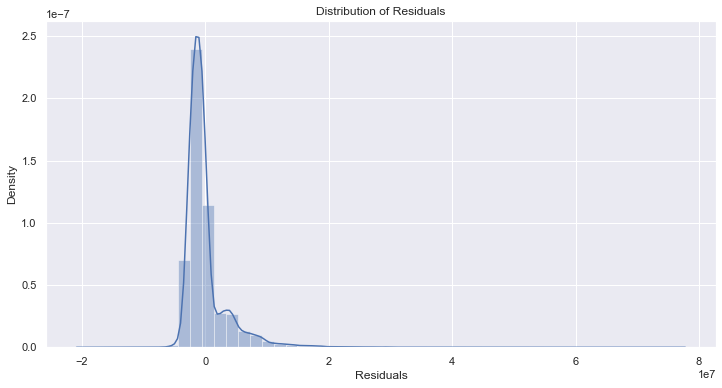

In [24]:
normal_errors_assumption(model_gamma,X_train_gamma,y_train_gamma)

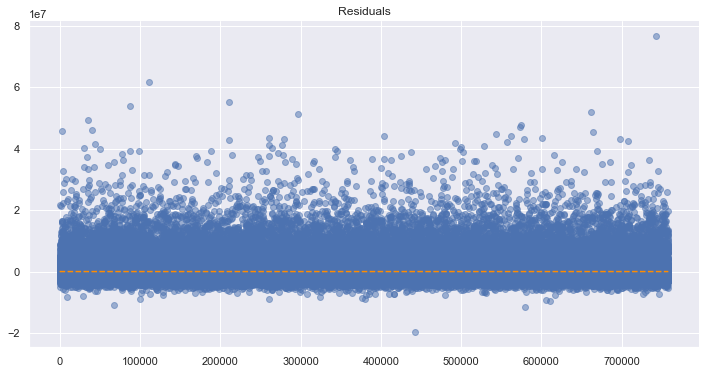

In [25]:
homoscedasticity_assumption(model_gamma,X_train_gamma,y_train_gamma)

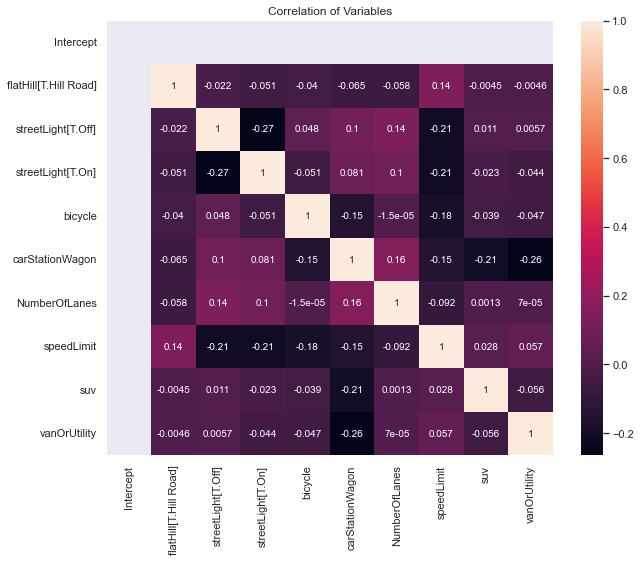

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Intercept: 24.688218750972442
flatHill[T.Hill Road]: 1.0270631206288539
streetLight[T.Off]: 1.205869650668654
streetLight[T.On]: 1.205843124769835
bicycle: 1.0946740117536902
carStationWagon: 1.2485952857711764
NumberOfLanes: 1.0648763245687587
speedLimit: 1.2230275392723542
suv: 1.0699558530055564
vanOrUtility: 1.1041917722282428

1 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied


In [26]:
multicollinearity_assumption(model_gamma,X_train_gamma,y_train_gamma,X_train_gamma.columns)

In [27]:
ypred_gtrain = model_gamma.predict(X_train_gamma)
RMSE_gtrain = np.sqrt(mean_squared_error(y_train_gamma,ypred_gtrain))
print("RMSE Of Gamma for train:",RMSE_gtrain)
MAE_gtrain = mean_absolute_error(y_train_gamma,ypred_gtrain)
print("MAE Of Gamma for train:",MAE_gtrain)

RMSE Of Gamma for train: 3635772.525312871
MAE Of Gamma for train: 2261344.176819275


In [28]:
ypred_gtest = model_gamma.predict(X_test_gamma)
RMSE_gtest = np.sqrt(mean_squared_error(y_test_gamma,ypred_gtest))
print("RMSE Of Gamma for test:",RMSE_gtest)
MAE_gtest = mean_absolute_error(y_test_gamma,ypred_gtest)
print("MAE Of Gamma for test:",MAE_gtest)

RMSE Of Gamma for test: 3588613.8731513475
MAE Of Gamma for test: 2248013.999701594


In [29]:
print(RMSE_gtrain/(y_train_gamma.max()-y_train_gamma.min()))
print(RMSE_gtest/(y_test_gamma.max()-y_test_gamma.min()))

claimAmount    0.044888
dtype: float64
claimAmount    0.058796
dtype: float64


In [30]:
df_gamma_Results = calculate_residuals(model_gamma,X_test_gamma,y_test_gamma)
df_gamma_Results.head()

,Actual,Predicted,Residuals,Residuals_per
531297,2113683.0,6.285900e+06,-4.172217e+06,1.973909
745953,4395885.0,4.723499e+06,-3.276141e+05,0.074527
183615,3578044.0,4.975658e+06,-1.397614e+06,0.390608
99047,2860876.0,4.556490e+06,-1.695614e+06,0.592690
340161,2503605.0,5.476547e+06,-2.972942e+06,1.187465


In [31]:
df_gamma_Results[df_gamma_Results['Residuals_per']<.5]

,Actual,Predicted,Residuals,Residuals_per
745953,4395885.0,4.723499e+06,-3.276141e+05,0.074527
183615,3578044.0,4.975658e+06,-1.397614e+06,0.390608
127442,3250631.0,4.562863e+06,-1.312232e+06,0.403685
303881,3088352.0,3.950197e+06,-8.618454e+05,0.279063
301162,4532263.0,4.331986e+06,2.002774e+05,0.044189
...,...,...,...,...
197002,3915950.0,4.562863e+06,-6.469134e+05,0.165200
80403,4300214.0,4.714794e+06,-4.145804e+05,0.096409
65543,4294386.0,5.110829e+06,-8.164426e+05,0.190119
415927,9775623.0,5.393604e+06,4.382019e+06,0.448260


In [32]:
df_gamma_Results[df_gamma_Results['Residuals_per']>.5]

,Actual,Predicted,Residuals,Residuals_per
531297,2113683.0,6.285900e+06,-4.172217e+06,1.973909
99047,2860876.0,4.556490e+06,-1.695614e+06,0.592690
340161,2503605.0,5.476547e+06,-2.972942e+06,1.187465
387947,2256849.0,4.714794e+06,-2.457945e+06,1.089105
757531,2602817.0,4.021068e+06,-1.418251e+06,0.544891
...,...,...,...,...
480665,2759729.0,4.979833e+06,-2.220104e+06,0.804465
600999,12026881.0,5.138893e+06,6.887988e+06,0.572716
198795,2319425.0,4.935085e+06,-2.615660e+06,1.127719
262035,2807118.0,5.314754e+06,-2.507636e+06,0.893313


### LIME

In [33]:
explanation_gamma = lime(model_gamma,X_test_gamma,y_test_gamma,X_train_gamma,y_train_gamma)
explanation_gamma.show_in_notebook()

Prediction :  None    6.074509e+06
dtype: float64
Actual :      claimAmount    4866152.0
Name: 29500, dtype: float64


### Log normal distribution

In [34]:
formula = "Log_claimAmount ~ bicycle+bridge+bus+carStationWagon+cliffBank+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+phoneBoxEtc+postOrPole+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver"
y, X = dmatrices(formula, df, return_type='dataframe')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
Feature = Feature_imp(LinearRegression(),10,X_test,y_test)
Feature[Feature.Decision == True]

,Decision,Ranking,Feature
5,True,1,urban[T.Urban]
6,True,1,bicycle
8,True,1,bus
9,True,1,carStationWagon
17,True,1,moped
24,True,1,parkedVehicle
29,True,1,slipOrFlood
32,True,1,suv
36,True,1,train
40,True,1,vanOrUtility


In [37]:
X_train_ols,y_train_ols = X_train[['Intercept','urban[T.Urban]','bus','carStationWagon','parkedVehicle','slipOrFlood','strayAnimal','suv','train','vanOrUtility']],y_train
X_test_ols,y_test_ols = X_test[['Intercept','urban[T.Urban]','bus','carStationWagon','parkedVehicle','slipOrFlood','strayAnimal','suv','train','vanOrUtility']],y_test

In [38]:
model_ols = sm.GLM(y_train_ols, X_train_ols,family=sm.families.Gaussian(link=sm.families.links.identity())).fit()

In [39]:
model_ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Generalized linear model
==================================================================
Model:              GLM              AIC:            214844.6284  
Link Function:      identity         BIC:            -1751225.2531
Dependent Variable: Log_claimAmount  Log-Likelihood: -1.0741e+05  
Date:               2022-04-13 10:52 LL-Null:        -1.1039e+05  
No. Observations:   150028           Deviance:       36776.       
Df Model:           9                Pearson chi2:   3.68e+04     
Df Residuals:       150018           Scale:          0.24514      
Method:             IRLS                                          
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept        15.2205   0.0030 4996.3728 0.0000 15.2145 15.2264
urban[T.Urban]   -0.1302   0.0027  -48.6614 0.0000 -0.1355 -0.1250
bus               0.1106   0.0107   10.3386 0.0000  0.0896  0.1316
carStationWagon   0.0971   0.0017   56.6403 0.0000  0.0937  0.1004
parkedVehicle    -0.0979   0.0050  -19.6290 0.0000 -0.1077 -0.0882
slipOrFlood      -0.0858   0.0433   -1.9812 0.0476 -0.1707 -0.0009
strayAnimal      -0.1678   0.0477   -3.5197 0.0004 -0.2612 -0.0744
suv               0.0964   0.0040   24.3545 0.0000  0.0887  0.1042
train             0.0975   0.0514    1.8983 0.0577 -0.0032  0.1982
vanOrUtility      0.1181   0.0033   35.9058 0.0000  0.1116  0.1245
==================================================================

"""

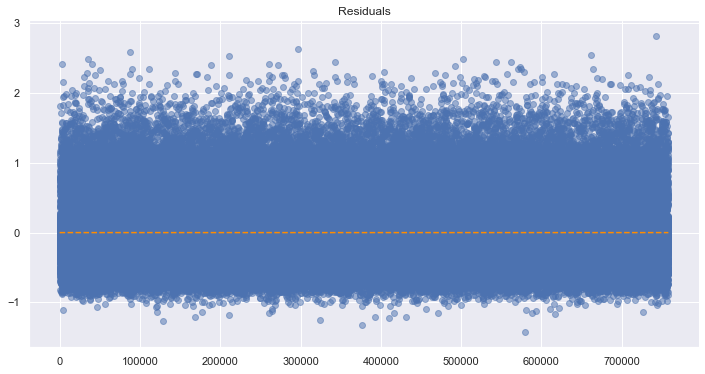

In [40]:
homoscedasticity_assumption(model_ols,X_train_ols,y_train_ols)

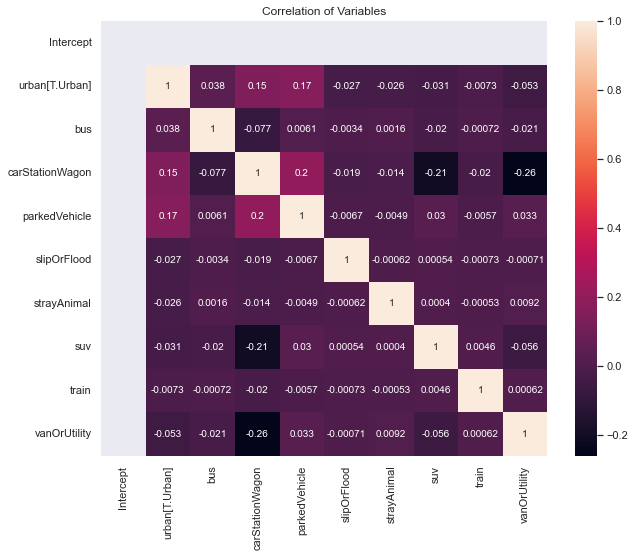

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Intercept: 5.679358199086362
urban[T.Urban]: 1.0468141003733535
bus: 1.0126217707849798
carStationWagon: 1.2184136689497762
parkedVehicle: 1.0792743248056447
slipOrFlood: 1.0010466277469663
strayAnimal: 1.0008197067593132
suv: 1.0684416304473487
train: 1.0004364170532811
vanOrUtility: 1.10200003142668

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [41]:
multicollinearity_assumption(model_ols,X_train_ols,y_train_ols,X_train_ols.columns)

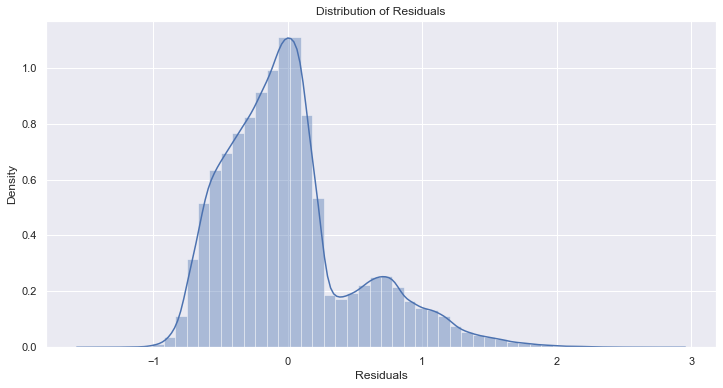

In [42]:
normal_errors_assumption(model_ols,X_train_ols,y_train_ols)

In [43]:
ypred_ltrain = model_ols.predict(X_train_ols)
RMSE_ltrain = np.sqrt(mean_squared_error(y_train_ols,ypred_ltrain))
print("RMSE Of Log-Normal for train:",RMSE_ltrain)
MAE_ltrain = mean_absolute_error(y_train_ols,ypred_ltrain)
print("MAE Of Log-Normal for train:",MAE_ltrain)

RMSE Of Log-Normal for train: 0.49510269059344353
MAE Of Log-Normal for train: 0.3708079237499779


In [44]:
ypred_ltest = model_ols.predict(X_test_ols)
RMSE_ltest = np.sqrt(mean_squared_error(y_test_ols,ypred_ltest))
print("RMSE Of Log-Normal for test:",RMSE_ltest)
MAE_ltest = mean_absolute_error(y_test_ols,ypred_ltest)
print("MAE Of Log-Normal for test:",MAE_ltest)

RMSE Of Log-Normal for test: 0.4939988202285951
MAE Of Log-Normal for test: 0.3696729653261947


In [45]:
print(RMSE_ltrain/(y_train_ols.max()-y_train_ols.min()))
print(RMSE_ltest/(y_test_ols.max()-y_test_ols.min()))

Log_claimAmount    0.133778
dtype: float64
Log_claimAmount    0.144216
dtype: float64


In [46]:
df_ols_results_t = calculate_residuals(model_ols,X_train_ols,y_train_ols,True)
df_ols_results_t.head()

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
566343,15.363098,15.317560,4700116.0,4.490884e+06,2.092318e+05,0.044516
689855,15.867373,15.317560,7782382.0,4.490884e+06,3.291498e+06,0.422942
673100,14.987246,15.747209,3227590.0,6.901224e+06,-3.673634e+06,1.138197
532066,15.012320,15.317560,3309542.0,4.490884e+06,-1.181342e+06,0.356950
613403,15.055909,15.338542,3456990.0,4.586106e+06,-1.129116e+06,0.326618


In [47]:
df_ols_results = calculate_residuals(model_ols,X_test_ols,y_test_ols,True)
df_ols_results.head()

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
531297,14.563942,15.414650,2113683.0,4.948773e+06,-2.835090e+06,1.341303
745953,15.296179,15.283755,4395885.0,4.341605e+06,5.427996e+04,0.012348
183615,15.090327,15.284429,3578044.0,4.344534e+06,-7.664898e+05,0.214220
99047,14.866638,15.208321,2860876.0,4.026148e+06,-1.165272e+06,0.407313
340161,14.733242,15.108705,2503605.0,3.644408e+06,-1.140803e+06,0.455664


In [48]:
RMSE_ltrain = np.sqrt(mean_squared_error(df_ols_results_t['ActualT'],df_ols_results_t['PredictedT']))
print("RMSE Of Log-Normal for train:",RMSE_ltrain)
MAE_ltrain = mean_absolute_error(df_ols_results_t['ActualT'],df_ols_results_t['PredictedT'])
print("MAE Of Log-Normal for train:",MAE_ltrain)

RMSE Of Log-Normal for train: 3720504.017646608
MAE Of Log-Normal for train: 2027969.7310818692


In [49]:
RMSE_ltest = np.sqrt(mean_squared_error(df_ols_results['ActualT'],df_ols_results['PredictedT']))
print("RMSE Of Log-Normal for test:",RMSE_ltest)
MAE_ltest = mean_absolute_error(df_ols_results['ActualT'],df_ols_results['PredictedT'])
print("MAE Of Log-Normal for test:",MAE_ltest)

RMSE Of Log-Normal for test: 3677590.5192878554
MAE Of Log-Normal for test: 2022134.2111017175


In [50]:
print(RMSE_ltrain/(df_ols_results_t['ActualT'].max()-df_ols_results_t['ActualT'].min()))
print(RMSE_ltest/(df_ols_results['ActualT'].max()-df_ols_results['ActualT'].min()))

0.04593391880668046
0.060254092492201365


In [51]:
df_ols_results[df_ols_results['Residuals_per']<.5]

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
745953,15.296179,15.283755,4395885.0,4.341605e+06,5.427996e+04,0.012348
183615,15.090327,15.284429,3578044.0,4.344534e+06,-7.664898e+05,0.214220
99047,14.866638,15.208321,2860876.0,4.026148e+06,-1.165272e+06,0.407313
340161,14.733242,15.108705,2503605.0,3.644408e+06,-1.140803e+06,0.455664
127442,14.994360,15.187339,3250631.0,3.942553e+06,-6.919219e+05,0.212858
...,...,...,...,...,...,...
559457,15.287850,15.185823,4359424.0,3.936579e+06,4.228452e+05,0.096996
197002,15.180569,15.187339,3915950.0,3.942553e+06,-2.660289e+04,0.006793
80403,15.274175,15.284429,4300214.0,4.344534e+06,-4.431984e+04,0.010306
65543,15.272819,15.317560,4294386.0,4.490884e+06,-1.964982e+05,0.045757


In [52]:
df_ols_results[df_ols_results['Residuals_per']>.5]

,Actual,Predicted,ActualT,PredictedT,Residuals,Residuals_per
531297,14.563942,15.414650,2113683.0,4.948773e+06,-2.835090e+06,1.341303
387947,14.629480,15.284429,2256849.0,4.344534e+06,-2.087685e+06,0.925044
757531,14.772105,15.187339,2602817.0,3.942553e+06,-1.339736e+06,0.514725
501650,16.244583,15.317560,11348352.0,4.490884e+06,6.857468e+06,0.604270
101731,16.519033,15.317560,14932230.0,4.490884e+06,1.044135e+07,0.699249
...,...,...,...,...,...,...
315015,15.995486,15.283755,8846089.0,4.341605e+06,4.504484e+06,0.509206
198795,14.656830,15.208321,2319425.0,4.026148e+06,-1.706723e+06,0.735839
262035,14.847669,15.338542,2807118.0,4.586106e+06,-1.778988e+06,0.633742
415927,16.095402,15.317560,9775623.0,4.490884e+06,5.284739e+06,0.540604


### LIME

In [53]:
explanation_ols = lime(model_ols,X_test_ols,y_test_ols,X_train_ols,y_test_ols)
explanation_ols.show_in_notebook()

Prediction :  None    15.41465
dtype: float64
Actual :      Log_claimAmount    15.397814
Name: 29500, dtype: float64
